<h1 style="color:MediumSeaGreen;">Analysis of Spotify Top 50 Tracks, 2020 </h1>

<h2> Introduction </h2>

<h3> What makes a hit song? </h3>

There are many factors that go into releasing popular music, this analysis breaks down what those factors using a dataset of Spotify's Top 50 Tracks for the year 2020. (Data from [Kaggle](https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020))

Spotify is a music streaming application that is widely used by music and podcast listeners. Spotify collects large amounts of streaming data and the current dataset inspects a subset containing the 50 most successful songs along the following features: artist, album, track name, energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration, and genre. This exploratory data analysis is a preliminary step towards empirically assessing the qualities of hit music. 

#### - by Miguel Diaz-Acevedo

---

In [1]:
import os

import numpy as np
import pandas as pd 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

__Download the data and read it into a DataFrame using Pandas.__

Create a data folder in the working directory:

In [2]:
os.makedirs('data', exist_ok=True)

Download and unzip the data into the data folder using Kaggle API<br>
If Kaggle API is not yet generated, run the script __generate_kaggle_credentials.py__ in the working directory

In [3]:
!kaggle datasets download -d atillacolak/top-50-spotify-tracks-2020 -p ./data --unzip

Dataset URL: https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020
License(s): CC0-1.0
  0%|                                               | 0.00/4.40k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.40k/4.40k [00:00<00:00, 2.22MB/s]


In [4]:
spotify_top_tracks = pd.read_csv('./data/spotifytoptracks.csv', index_col=[0])

## Data Cleaning 

In [5]:
spotify_top_tracks = spotify_top_tracks.drop(columns='track_id')
spotify_top_tracks.head()

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


__assess data quality: data types, missing values, duplicate information, and outliers___

In [6]:
spotify_top_tracks.dtypes

artist               object
album                object
track_name           object
energy              float64
danceability        float64
key                   int64
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

convert "object type" and other categorical variables to "category" dtype

In [7]:
categorical_columns = ['artist', 'album', 'track_name', 'key', 'genre']
spotify_top_tracks[categorical_columns] = spotify_top_tracks[categorical_columns].astype('category')

check data for missing values (e.g. np.nan)

In [8]:
print(spotify_top_tracks.isnull().values.any())

False


__check data for duplicate values__

In [9]:
print(f"Any Duplicated Instances?:     {spotify_top_tracks.duplicated().values.any()}")

print(f"Any Duplicated Features? :     {spotify_top_tracks.columns.duplicated().any()}")

Any Duplicated Instances?:     False
Any Duplicated Features? :     False


__assess outliers in the data__

In [10]:
# first, focus only on numeric values
numeric_only_spotify = spotify_top_tracks.select_dtypes(include=['float64', 'int64'], exclude=['object'])

# detect outliers using z-score method
z_threshold = 3 

numeric_only_spotify_z_scores = numeric_only_spotify.apply(stats.zscore)
z_scores = numeric_only_spotify_z_scores.apply(np.abs)
z_outliers = z_scores[z_scores > z_threshold]
z_mask = z_outliers.notnull()
z_outliers = z_outliers.where(z_mask)
z_outliers = z_outliers.dropna(how='all')
print(z_outliers)
z_outliers_indices = z_outliers.index
spotify_top_tracks.iloc[z_outliers_indices]

    energy  danceability  loudness  acousticness  speechiness  \
2      NaN           NaN       NaN           NaN          NaN   
19     NaN           NaN       NaN           NaN     3.137086   
24     NaN           NaN  3.537252           NaN          NaN   
41     NaN           NaN       NaN           NaN          NaN   
49     NaN           NaN       NaN           NaN          NaN   

    instrumentalness  liveness  valence  tempo  duration_ms  
2                NaN  3.394333      NaN    NaN          NaN  
19               NaN       NaN      NaN    NaN          NaN  
24          6.866026       NaN      NaN    NaN          NaN  
41               NaN  3.405773      NaN    NaN          NaN  
49               NaN       NaN      NaN    NaN     3.353633  


,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.00000,0.790,0.642,116.971,196653,Hip-Hop/Rap
19,Future,High Off Life,Life Is Good (feat. Drake),0.574,0.795,2,-6.903,0.06700,0.4870,0.00000,0.150,0.537,142.053,237918,Hip-Hop/Rap
24,Billie Eilish,everything i wanted,everything i wanted,0.225,0.704,6,-14.454,0.90200,0.0994,0.65700,0.106,0.243,120.006,245426,Pop
41,Black Eyed Peas,Translation,RITMO (Bad Boys For Life),0.704,0.723,10,-7.088,0.02590,0.0571,0.00109,0.792,0.684,105.095,214935,Pop
49,Travis Scott,ASTROWORLD,SICKO MODE,0.730,0.834,8,-3.714,0.00513,0.2220,0.00000,0.124,0.446,155.008,312820,Hip-Hop/Rap


In [11]:
# replace substantial outlier with median value 
spotify_top_tracks.loc[24, 'instrumentalness'] = spotify_top_tracks['instrumentalness'].median()
spotify_top_tracks

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie


*Conclusion:*

Only one of those outliers appeared to likely be due to measurement error (index=24, artist=Bilie Eilish, instrumentalness score=0.657). After listening to this song, it appeared to have a typical amount of vocal content, Hence, I replaced this with a median score of 0. The rest of the information appeared to be within the realm of possibility to accurate represent the data.  

---

## Exploratory Data Analysis


In [12]:
# how many observations are in the dataset? 

observations = spotify_top_tracks.size
print(f'The data contains {observations} observations.')

The data contains 750 observations.


In [13]:
# how many features does that dataset contain? 

n_tracks, features = spotify_top_tracks.shape
print(f'The data contains {features} features.')

The data contains 15 features.


In [14]:
# which features are categorical? 

categorical_features = spotify_top_tracks.select_dtypes(include=['category']).columns.tolist()
print(f"The categorical features in the data include: {', '.join(categorical_features)}.")

The categorical features in the data include: artist, album, track_name, key, genre.


In [15]:
# which features are numerical? 

numerical_features = spotify_top_tracks.select_dtypes(include=['number']).columns.tolist()
print(f"The numerical features in the data include: \n{', '.join(numerical_features)}.")

The numerical features in the data include: 
energy, danceability, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms.


In [16]:
# these artists have > 1 popular track
grouped_by_artist = spotify_top_tracks.groupby('artist', observed=True)
artists_more_than_one_song = grouped_by_artist['artist'].filter(lambda x: len(x) > 1).unique()
print(f"These artists had more than one popular song:\n{', '.join(artists_more_than_one_song)}")

These artists had more than one popular song:
Dua Lipa, Harry Styles, Lewis Capaldi, Post Malone, Justin Bieber, Billie Eilish, Travis Scott


In [17]:
# This is exactly how many tracks each artist had on the list 

artist_counts = spotify_top_tracks.value_counts("artist")
print(artist_counts)

artist
Billie Eilish      3
Dua Lipa           3
Travis Scott       3
Lewis Capaldi      2
Harry Styles       2
Post Malone        2
Justin Bieber      2
24kGoldn           1
Black Eyed Peas    1
Bad Bunny          1
BTS                1
BENEE              1
Ariana Grande      1
Arizona Zervas     1
Drake              1
Doja Cat           1
Future             1
Eminem             1
Jawsh 685          1
JP Saxe            1
Juice WRLD         1
KAROL G            1
Cardi B            1
DaBaby             1
Lil Mosey          1
Lady Gaga          1
Maroon 5           1
Maluma             1
Regard             1
Roddy Ricch        1
SAINt JHN          1
Powfu              1
Shawn Mendes       1
Surf Mesa          1
THE SCOTTS         1
Surfaces           1
The Weeknd         1
Tones And I        1
Topic              1
Trevor Daniel      1
Name: count, dtype: int64


In [18]:
# These are just the artists who had multiple songs. 

artists_with_multiple_songs = artist_counts[artist_counts > 1]
print(artists_with_multiple_songs)

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Lewis Capaldi    2
Harry Styles     2
Post Malone      2
Justin Bieber    2
Name: count, dtype: int64


In [19]:
# The top artist(s)

artist_counts[artist_counts == artist_counts.max()]

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Name: count, dtype: int64

In [20]:
# how many artists are on the top 50 list? 

num_artists = len(artist_counts)
print(f'There are {num_artists} artists on the list.')

There are 40 artists on the list.


In [21]:
# Do any albums have more than one top 50 track?

album_counts = spotify_top_tracks.groupby(['artist','album'], observed=True).size()
albums_with_multiple_songs = album_counts[album_counts > 1]
albums_with_multiple_songs = albums_with_multiple_songs.reset_index()
albums_with_multiple_songs.rename(columns={0:'# of songs in top 50'}, inplace=True)
print(albums_with_multiple_songs.to_string(index=False))
print(f'\n\nThere are {len(albums_with_multiple_songs)} albums with more than one song in the top 50.')

       artist                album  # of songs in top 50
     Dua Lipa     Future Nostalgia                     3
 Harry Styles            Fine Line                     2
Justin Bieber              Changes                     2
  Post Malone Hollywood's Bleeding                     2


There are 4 albums with more than one song in the top 50.


In [22]:
# How many albums in total have their songs in the top 50? 

n_albums = album_counts.size
print(f'There are {n_albums} albums on the list')

There are 45 albums on the list


In [23]:
# which tracks have a danceability score > 0.7? 

hi_danceability_mask = spotify_top_tracks['danceability'] > 0.7
dance_songs = spotify_top_tracks[hi_danceability_mask]
dance_songs[['artist', 'track_name', 'danceability']].sort_values(by='danceability', ascending=False)

,artist,track_name,danceability
27,Cardi B,WAP (feat. Megan Thee Stallion),0.935
2,Roddy Ricch,The Box,0.896
39,Regard,Ride It,0.880
28,Surfaces,Sunday Best,0.878
33,BENEE,Supalonely (feat. Gus Dapperton),0.862
40,Travis Scott,goosebumps,0.841
49,Travis Scott,SICKO MODE,0.834
15,Drake,Toosie Slide,0.830
1,Tones And I,Dance Monkey,0.825
29,Eminem,Godzilla (feat. Juice WRLD),0.808


In [24]:
# which tracks have a danceability score < 0.4? 

lo_danceability_mask = spotify_top_tracks['danceability'] < 0.4
not_dance_songs = spotify_top_tracks[lo_danceability_mask]
not_dance_songs[['artist', 'track_name', 'danceability']]

,artist,track_name,danceability
44,Billie Eilish,lovely (with Khalid),0.351


In [25]:
# which tracks are louder than -5db? 

loud_mask = spotify_top_tracks['loudness'] > -5
loud_songs = spotify_top_tracks[loud_mask]
loud_songs[['artist', 'track_name', 'loudness']].sort_values(by='loudness', ascending=False)

,artist,track_name,loudness
10,KAROL G,Tusa,-3.280
40,Travis Scott,goosebumps,-3.370
31,Dua Lipa,Break My Heart,-3.434
38,Maluma,Hawái,-3.454
12,Post Malone,Circles,-3.497
23,24kGoldn,Mood (feat. iann dior),-3.558
21,Harry Styles,Adore You,-3.675
49,Travis Scott,SICKO MODE,-3.714
48,Dua Lipa,Physical,-3.756
35,Lady Gaga,Rain On Me (with Ariana Grande),-3.764


In [26]:
# which tracks are quieter than -8db? 

quiet_mask = spotify_top_tracks['loudness'] < -8
quiet_songs = spotify_top_tracks[quiet_mask]
quiet_songs[['artist', 'track_name', 'loudness']].sort_values(by='loudness', ascending=False)

,artist,track_name,loudness
20,Jawsh 685,Savage Love (Laxed - Siren Beat),-8.520
8,Trevor Daniel,Falling,-8.756
36,Travis Scott,HIGHEST IN THE ROOM,-8.764
7,Powfu,death bed (coffee for your head),-8.765
15,Drake,Toosie Slide,-8.820
47,JP Saxe,If the World Was Ending - feat. Julia Michaels,-10.086
44,Billie Eilish,lovely (with Khalid),-10.109
26,Billie Eilish,bad guy,-10.965
24,Billie Eilish,everything i wanted,-14.454


In [27]:
# what is the longest song? 

max_song_length = spotify_top_tracks['duration_ms'].max()
spotify_top_tracks[spotify_top_tracks['duration_ms'] == max_song_length]

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
49,Travis Scott,ASTROWORLD,SICKO MODE,0.73,0.834,8,-3.714,0.00513,0.222,0.0,0.124,0.446,155.008,312820,Hip-Hop/Rap


In [28]:
# what is the shortest song? 

min_song_length = spotify_top_tracks['duration_ms'].min()
spotify_top_tracks[spotify_top_tracks['duration_ms'] == min_song_length]

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
23,24kGoldn,Mood (feat. iann dior),Mood (feat. iann dior),0.722,0.7,7,-3.558,0.221,0.0369,0.0,0.272,0.756,90.989,140526,Pop rap


### Genre Analysis

note:
<br>
Many tracks had more than one genre associated with them, so first I will analyze the data using each track's individual genre information. Then we will look at genre data in a more general way. 

In [29]:
# these are all of the genres represented on the top 50 where each entry is an individual song. 

spotify_top_tracks.value_counts('genre')

genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
 Electro-pop                           2
R&B/Soul                               2
Chamber pop                            1
Alternative/reggaeton/experimental     1
Dreampop/Hip-Hop/R&B                   1
Disco-pop                              1
Dance-pop/Disco                        1
Hip-Hop/Trap                           1
Nu-disco                               1
Pop rap                                1
Pop/Soft Rock                          1
R&B/Hip-Hop alternative                1
Name: count, dtype: int64

In [30]:
# this is the top genre on the top 50 list when you look at each entry as a single song.

genre_counts = spotify_top_tracks.value_counts('genre')
genre_counts[genre_counts == genre_counts.max()]

genre
Pop    14
Name: count, dtype: int64

In [31]:
# the genres with only 1 song on the list include: 

genre_counts[genre_counts == 1]

genre
Chamber pop                           1
Alternative/reggaeton/experimental    1
Dreampop/Hip-Hop/R&B                  1
Disco-pop                             1
Dance-pop/Disco                       1
Hip-Hop/Trap                          1
Nu-disco                              1
Pop rap                               1
Pop/Soft Rock                         1
R&B/Hip-Hop alternative               1
Name: count, dtype: int64

__However, some songs have multiple genres.  
<br>so, we can look further at the genre data with a perspective agnostic to the number of songs on the list.__

In [32]:
# here are how many genres there are in total in the data.

split_genres = spotify_top_tracks['genre'].str.split('/', expand=True)
stacked_genres = split_genres.stack()
split_genre_counts = stacked_genres.value_counts()
print(split_genre_counts, '\n\n')
print(f'There are {split_genre_counts.shape[0]} unique genres in total on the top 50 list.')

Hip-Hop                15
Pop                    15
Rap                    13
Alternative             5
Dance                   5
Electronic              5
R&B                     4
Indie                   4
Soul                    2
 Electro-pop            2
Nu-disco                1
Hip-Hop alternative     1
Soft Rock               1
Pop rap                 1
Trap                    1
Dance-pop               1
Disco                   1
Disco-pop               1
Dreampop                1
reggaeton               1
experimental            1
Chamber pop             1
Name: count, dtype: int64 


There are 22 unique genres in total on the top 50 list.


In [33]:
# the following genres are only seen once on the list:

split_genre_counts[split_genre_counts == 1]

Nu-disco               1
Hip-Hop alternative    1
Soft Rock              1
Pop rap                1
Trap                   1
Dance-pop              1
Disco                  1
Disco-pop              1
Dreampop               1
reggaeton              1
experimental           1
Chamber pop            1
Name: count, dtype: int64

In [34]:
hip_hop_mapping = {
    'Hip-Hop': 'Hip-Hop and related genres',
    'Rap': 'Hip-Hop and related genres',
    'Trap': 'Hip-Hop and related genres',
    'Pop rap': 'Hip-Hop and related genres',
    'Hip-Hop Alternative': 'Hip-Hop and related genres',
}

hip_hop_genres = split_genre_counts.index.to_series().map(hip_hop_mapping)
hip_hop_genre_counts = split_genre_counts.groupby(hip_hop_genres).sum()
print(hip_hop_genre_counts)
print('\n related genres include: Hip-Hop, Rap, Trap, Pop rap, and Hip-Hop Alternative')

Hip-Hop and related genres    30
Name: count, dtype: int64

 related genres include: Hip-Hop, Rap, Trap, Pop rap, and Hip-Hop Alternative


In [35]:
# Combining all forms of "Pop" music

pop_counts = split_genre_counts[split_genre_counts.index.str.lower().str.contains('pop')]
aggregated_counts = pd.Series({'Pop': pop_counts.sum()})
print("Combining all forms of 'pop' music:")
print(aggregated_counts)

Combining all forms of 'pop' music:
Pop    22
dtype: int64


Whereas Pop was the most popular genre when the data was analyzed as a whole, breaking the data down by genre and looking deeper, it appears that Hip-Hop might be more popular the Pop music on the whole. 

--- 
## Assess Correlations in the Data 
---

In [36]:
# create a correlation matrix for the entire DataFrame of Spotify top 50 data
spotify_corr_mat = numeric_only_spotify.corr()
spotify_corr_mat

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
loudness,0.791640,0.167147,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328
duration_ms,0.081971,-0.033763,0.064130,-0.010988,0.366976,0.184709,-0.090188,-0.039794,0.130328,1.000000


In [37]:
# for purposes of completion only: 
# used sample code from internet to calculate p-values for the correlations
# however, for sake of full disclosure I do not find it easy to fully understand. 


rho = spotify_corr_mat
pval = numeric_only_spotify.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.0***,0.15,0.79***,-0.68***,0.07,-0.39**,0.07,0.39**,0.08,0.08
danceability,0.15,1.0***,0.17,-0.36*,0.23,-0.02,-0.01,0.48***,0.17,-0.03
loudness,0.79***,0.17,1.0***,-0.5***,-0.02,-0.55***,-0.07,0.41**,0.1,0.06
acousticness,-0.68***,-0.36*,-0.5***,1.0***,-0.14,0.35*,-0.13,-0.24,-0.24,-0.01
speechiness,0.07,0.23,-0.02,-0.14,1.0***,0.03,-0.14,0.05,0.22,0.37**
instrumentalness,-0.39**,-0.02,-0.55***,0.35*,0.03,1.0***,-0.09,-0.2,0.02,0.18
liveness,0.07,-0.01,-0.07,-0.13,-0.14,-0.09,1.0***,-0.03,0.03,-0.09
valence,0.39**,0.48***,0.41**,-0.24,0.05,-0.2,-0.03,1.0***,0.05,-0.04
tempo,0.08,0.17,0.1,-0.24,0.22,0.02,0.03,0.05,1.0***,0.13
duration_ms,0.08,-0.03,0.06,-0.01,0.37**,0.18,-0.09,-0.04,0.13,1.0***


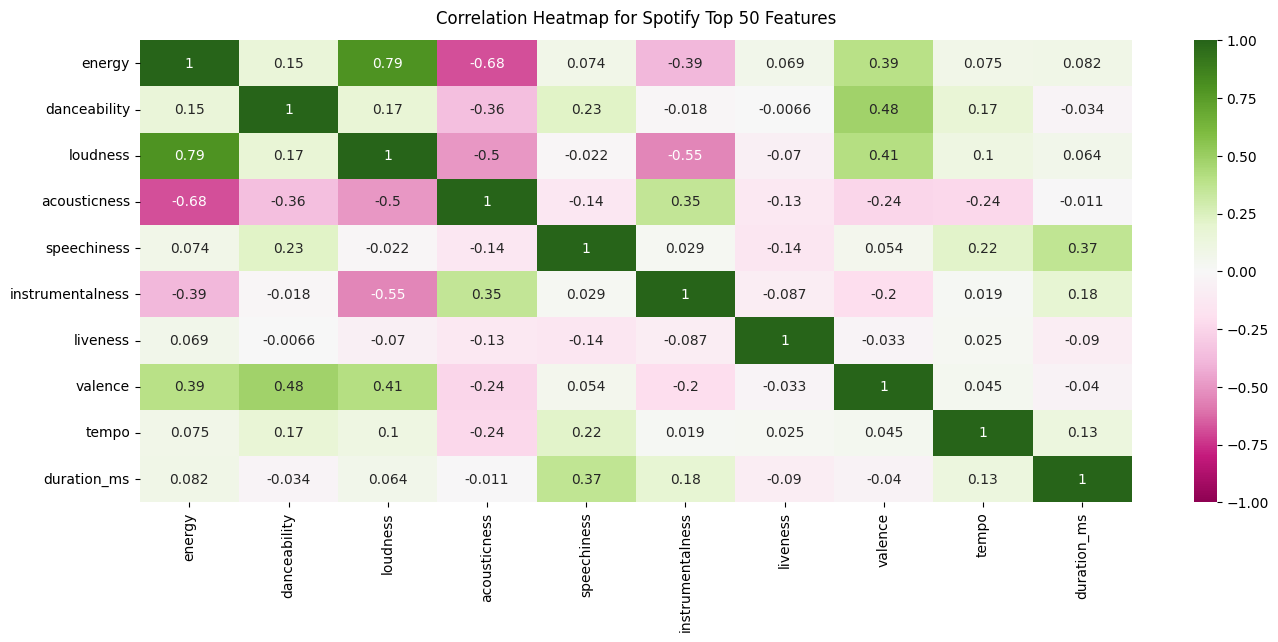

In [38]:
# plot as a heatmap
plt.figure(figsize=(16, 6))
spotify_corr_heatmap = sns.heatmap(spotify_corr_mat, vmin=-1, vmax=1, annot=True, cmap="PiYG");
spotify_corr_heatmap.set_title('Correlation Heatmap for Spotify Top 50 Features', fontdict={'fontsize':12}, pad=12);

In [39]:
# which features are strongly correlated in the data?
spotify_corr_mat[spotify_corr_mat > 0.7]

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.00000,NaN,0.79164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,0.79164,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [40]:
# any moderate correlations?
spotify_corr_mat[(0.3 < spotify_corr_mat) & (spotify_corr_mat < 0.7)]

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393453,NaN,NaN
danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479953,NaN,NaN
loudness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.406772,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,0.352184,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366976
instrumentalness,NaN,NaN,NaN,0.352184,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,0.393453,0.479953,0.406772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,0.366976,NaN,NaN,NaN,NaN,NaN


Energy and loudness are strongly correlated (R=0.79, p<.001), and other features show moderate positive correlations.

In [41]:
# which features are strongly negatively correlated? 
spotify_corr_mat[spotify_corr_mat < -0.7]

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# any moderate negative correlations?
spotify_corr_mat[spotify_corr_mat < -0.3]

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,NaN,NaN,-0.682479,NaN,-0.385515,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,-0.359135,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,-0.498695,NaN,-0.553735,NaN,NaN,NaN,NaN
acousticness,-0.682479,-0.359135,-0.498695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,-0.385515,NaN,-0.553735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While no features show an apparent strong negative correlation, acousticness and energy do appear to be negatively correlated (R=-0.68, p<.001), as does instrumentalness and energy (R=-0.39, p<.01), acousticness and loudness (R=-0.50, p<.001), acousticness and danceability (R=-0.36, p<.05). 

In [43]:
# which features have no correlation (or almost no correlation)? 
spotify_corr_mat[(0.01 > spotify_corr_mat) & (spotify_corr_mat > -0.01)]

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,NaN,NaN,-0.006648,NaN,NaN,NaN
loudness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,-0.006648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Liveness and Danceability do not show much of an apparent correlation. 

---
## Comparing the top 4 genres: 
### Pop vs. Hip-Hop/Rap vs. Dance/Electronic vs. Alternative/Indie Genres

In [44]:
genre_counts

genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
 Electro-pop                           2
R&B/Soul                               2
Chamber pop                            1
Alternative/reggaeton/experimental     1
Dreampop/Hip-Hop/R&B                   1
Disco-pop                              1
Dance-pop/Disco                        1
Hip-Hop/Trap                           1
Nu-disco                               1
Pop rap                                1
Pop/Soft Rock                          1
R&B/Hip-Hop alternative                1
Name: count, dtype: int64

In [45]:
# Filter the DataFrame to include only the selected genres

top_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
genre_filtered_tracks = spotify_top_tracks[spotify_top_tracks['genre'].isin(top_genres)]
genre_filtered_tracks.head()

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
1,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.6880,0.0988,0.000161,0.170,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.1040,0.0559,0.000000,0.790,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.0149,0.0506,0.004320,0.285,0.894,121.962,176219,Dance/Electronic
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),0.690,0.746,11,-7.956,0.2470,0.1640,0.000000,0.101,0.497,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,0.816,0.548,0,-4.209,0.1220,0.0465,0.000000,0.335,0.557,95.390,174000,Pop


In [46]:
# group tracks by genre

genre_groups = genre_filtered_tracks.groupby('genre', observed=True)

In [47]:
# Compare danceability between different genres 

genre_danceability_stats = genre_groups['danceability'].describe()
genre_danceability_stats

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Alternative/Indie,4.0,0.661750,0.211107,0.459,0.49050,0.663,0.83425,0.862
Dance/Electronic,5.0,0.755000,0.094744,0.647,0.67400,0.785,0.78900,0.880
Hip-Hop/Rap,13.0,0.765538,0.085470,0.598,0.72600,0.774,0.83000,0.896
Pop,14.0,0.677571,0.109853,0.464,0.61575,0.690,0.76275,0.806


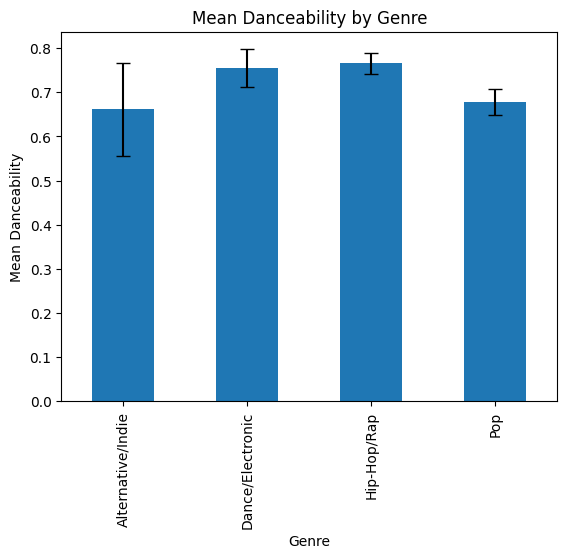

In [48]:
# plot the danceability for each genre 

# Calculate the standard error for 'danceability'
danceability_standard_error = genre_groups['danceability'].sem()

genre_mean_danceability = genre_groups['danceability'].mean()
genre_mean_danceability.plot(kind='bar', yerr=danceability_standard_error, capsize=5)
plt.title('Mean Danceability by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Danceability')
plt.show()

Noteably, Danceability does not appear to be particularly different between genres. However, Alternative/Indie does contain a lower minimum danceablity than other genres

In [49]:
# Compare loudness between different genres 

genre_loudness_stats = genre_groups['loudness'].describe()
genre_loudness_stats

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Alternative/Indie,4.0,-5.421000,0.774502,-6.401,-5.85950,-5.2685,-4.83000,-4.746
Dance/Electronic,5.0,-5.338000,1.479047,-7.567,-5.65200,-5.4570,-4.25800,-3.756
Hip-Hop/Rap,13.0,-6.917846,1.891808,-8.820,-8.52000,-7.6480,-5.61600,-3.370
Pop,14.0,-6.460357,3.014281,-14.454,-7.17875,-6.6445,-3.87525,-3.280


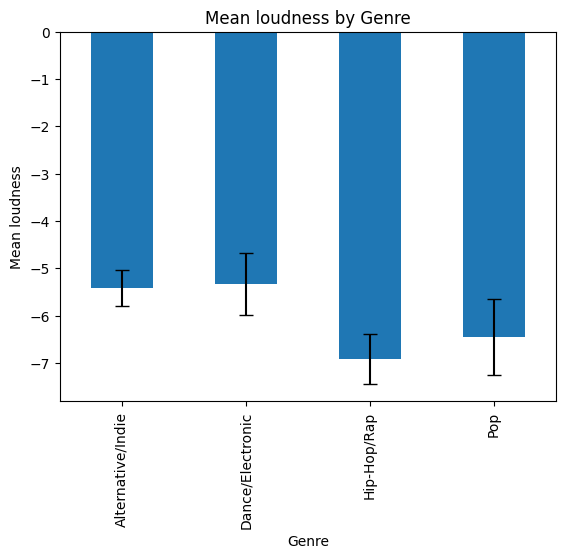

In [50]:
# plot the loudness for each genre 

# Calculate the standard error for 'loudness'
loudness_standard_error = genre_groups['loudness'].sem()

genre_mean_loudness = genre_groups['loudness'].mean()
genre_mean_loudness.plot(kind='bar', yerr=loudness_standard_error, capsize=5)
plt.title('Mean loudness by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean loudness')
plt.show()

In general, Alternative/Indie and Dance/Electronic are slightly louder than Hip-Hop/Rap and Pop. 

In [51]:
# Compare acousticness between different genres 

genre_acousticness_stats = genre_groups['acousticness'].describe()
genre_acousticness_stats

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Alternative/Indie,4.0,0.583500,0.204086,0.29100,0.52575,0.6460,0.70375,0.751
Dance/Electronic,5.0,0.099440,0.095828,0.01370,0.01490,0.0686,0.17700,0.223
Hip-Hop/Rap,13.0,0.188741,0.186396,0.00513,0.06700,0.1450,0.23400,0.731
Pop,14.0,0.323843,0.318142,0.02100,0.05990,0.2590,0.34800,0.902


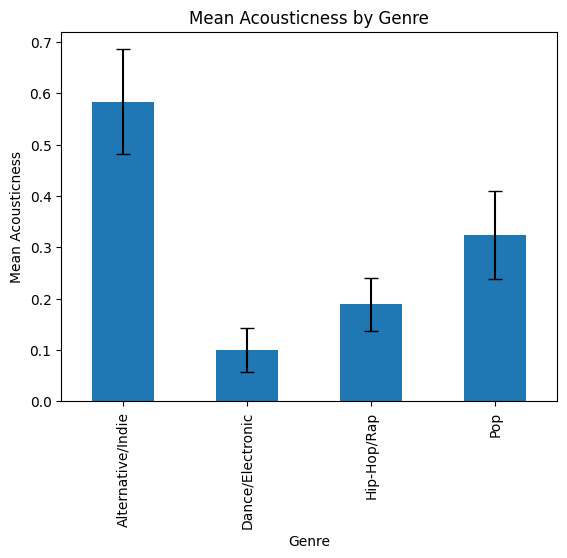

In [52]:
# plot the acousticness for each genre 

# Calculate the standard error for 'acousticness'
acousticness_standard_error = genre_groups['acousticness'].sem()

genre_mean_acousticness = genre_groups['acousticness'].mean()
genre_mean_acousticness.plot(kind='bar', yerr=acousticness_standard_error, capsize=5)
plt.title('Mean Acousticness by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Acousticness')
plt.show()

According to these data, Alternative/Indie has the most "Acousticness" to it's music, followed by Pop, Hip-Hop/Rap, and Dance/Electronic, in that order. However, there are only 4 and 5 observations respectively for Alternative/Indie and Dance/Electronic. 

**conclusions:**
Overall, it appears that loud and danceable hip-hop and pop music is popular for the year 2020. Artists like Dua Lipa, Billie Eilish,Harry Styles, Justin Bieber, Travis Scott, and Post Malone are prime examples to pay attention to because they have managed to make it on the list more than once. Billie Eilish is interesting because their music seems to not be as loud as other artists and yet they have 3 songs on the list, a feat only accomplished by Travis Scott and Dua Lipa. 

**future directions:**

While this preliminary study is informative, more research would need to be done to predictively model what a hit song might be. It would be nice to know exactly how many streams each song and artist had at the time this data was collected, so that popularity could be assessed based on number of streams and not just the demographic data provided in this dataset. 

Further studies will benefit from predictive modeling using regression-based techniques to attempt to predict what might be a successful track in the future. Other analyses such as principal components analysis (PCA) or clustering algorithms could group successful songs based on streaming successes in a less biased way to determine if there are particular features that are found clusters of the most successful songs. Moreover, I found the graphs to be quite informative, and more visual assessment might show more relevant details. 


Critiques of the current study: 

I could've made it easier to asses the signifcance of correlations. While I did borrow code from an internet source to extract significance using p-values related to Pearson correlations in these data, I did not use a method that I could digest to my level of satisfaction. Relatedly, I could've performed an ANOVA or other when comparing genres to determine whether the observed relationships were meaningful. 